 # 【 DataAnalysis Basic 】 

 ## Pandas (DataFrame Library) 

 ○ Pandas Libarary 실행 

In [1]:
import pandas as pd

 ○ Data Load (데이터불러오기) 

In [2]:
# 데이터 파일 또는 URL-File에서 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/kimds929/kimds929.github.io/master/_data/test_df.csv")
df

,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


In [3]:
# 데이터 클립보드에서 불러오기
# df = pd.read_clipboard()
df

,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


In [4]:
# 직접입력 Data로부터 만들기
test_dict = {'y': [10, 13, 20, 7, 15],
            'x1': [2, 4, 5, 2, 4],
            'x2': ['a', 'a', 'b', 'b', 'b'],
            'x3': [10, 8, 5, 12, 7],
            'x4': ['g1', 'g2', 'g1', 'g2', 'g3']}

df = pd.DataFrame(test_dict)
df


,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


In [5]:
# 데이터 클립보드로 내보내기
df.to_clipboard()



 ○ Display & Indexing (데이터 확인 & 인덱싱) 

In [6]:
df      # 데이터보기

,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


In [7]:
df.sample(3)      # 데이터보기 (3개만보기)

,y,x1,x2,x3,x4
4,15,4,b,7,g3
3,7,2,b,12,g2
2,20,5,b,5,g1


In [8]:
# 1개 Colum 선택하기 (select, indexing)
df['x1']                # 1개만 선택 (Series)

0    2
1    4
2    5
3    2
4    4
Name: x1, dtype: int64

In [9]:
# 2개이상 Colum 선택하기 (select, indexing)
df[['x1', 'x2']]        # 2개이상 선택 (DataFrame)

,x1,x2
0,2,a
1,4,a
2,5,b
3,2,b
4,4,b


In [10]:
# 1개이상 Colum을 DataFrame형태로 선택하기 (select, indexing)
df[['x1']]        # 1개를 DataFrame 형태로 선택 (DataFrame)


,x1
0,2
1,4
2,5
3,2
4,4


 **※ (참고) 기능어 역할** </br>
&nbsp; □.□ : 앞의 대상에 어떤 함수를 사용하거나, 변수를 불러올때 사용 </br>
&nbsp;&nbsp;&nbsp;   pd.read_csv(...) → pandas Library에서  read_csv 함수를 사용 </br>
    </br>
&nbsp; □() : 함수( input → 함수 → output) </br>
&nbsp;&nbsp;&nbsp;   pd.read_csv(...) → pandas Library에서  read_csv함수를 사용하는데 ...이라는 경로에서 불러올 예정 </br>
    </br>
&nbsp; □[] : 대상에 접근, Item추출 </br>
&nbsp;&nbsp;&nbsp;   df['x1'] → df라는 데이터프레임에서 'x1' column에 접근하여 데이터를 추출 </br>
</br>
</br>

 ○ Filtering (필터링) 

In [11]:
# 'equal' filtering
df[df['x2'] == 'a']

,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2


In [12]:
# 'not equal' filtering
df[df['x2'] != 'a']

,y,x1,x2,x3,x4
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


In [13]:
# 'inequality' filtering
df[df['y'] > 10]

,y,x1,x2,x3,x4
1,13,4,a,8,g2
2,20,5,b,5,g1
4,15,4,b,7,g3


In [14]:
# filtering → select 'x2'
df[df['x2'] == 'a']['x2']       # 필터링 후 특정 column선택


0    a
1    a
Name: x2, dtype: object

 ○ Operation (연산) 

In [15]:
# 'x1' column select
df['x1']

0    2
1    4
2    5
3    2
4    4
Name: x1, dtype: int64

In [16]:
# 갯수
df['x1'].count()

5

In [17]:
# 합계
df['x1'].sum()

17

In [18]:
# 평균
df['x1'].mean()

3.4

In [19]:
# 편차
df['x1'].std()

1.3416407864998738

In [20]:
# 합계함수로 평균값 구하기
df['x1'].agg('mean')

3.4

In [21]:
# 합계함수로 여러개의 통계값(갯수, 평균, 편차) 한꺼번에 구하기
df['x1'].agg(['count', 'mean', 'std'])

count    5.000000
mean     3.400000
std      1.341641
Name: x1, dtype: float64

 ○ groupby (Pivot) 

In [22]:
# 'x2'로 grouping 후 전체 Column에 대한 합계
df.groupby('x2').sum()

,y,x1,x3
x2,,,
a,23,6,18
b,42,11,24


In [23]:
# 'x2'로 grouping 후 'x1'column에 대한 합계
df.groupby('x2')['x1'].sum()

x2
a     6
b    11
Name: x1, dtype: int64

In [24]:
# 'x2, x4' 로 grouping 후 'x1'column에 대한 합계
df.groupby(['x2','x4'])['x1'].sum()

x2  x4
a   g1    2
    g2    4
b   g1    5
    g2    2
    g3    4
Name: x1, dtype: int64

In [25]:
# 'x2, x4' 로 grouping 후 'x1'column에 대한 통계값(갯수, 평균, 편차)
df.groupby(['x2','x4'])['x1'].agg(['count','mean','std'])


count  mean  std
x2 x4                  
a  g1      1     2  NaN
   g2      1     4  NaN
b  g1      1     5  NaN
   g2      1     2  NaN
   g3      1     4  NaN

</br>
</br>
</br>
</br>
</br>

 ## Matplotlib.pyplot & Seaborn (Graph Library) 

 ○ matplotlib, seaborn Libarary 실행 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# data 확인
df


,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


 ○ Draw Graph 

(array([2., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

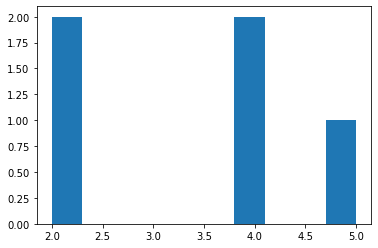

In [28]:
# histogram
plt.hist(x=df['x1'])      # histogram

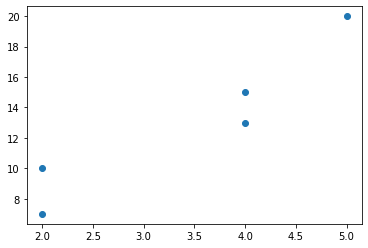

In [29]:
# scatter-plot
plt.scatter(x=df['x1'], y=df['y'])      # scatter plot

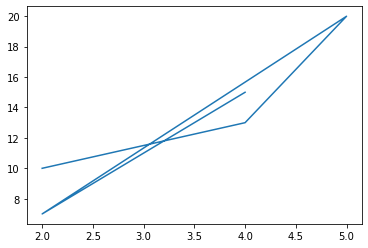

In [30]:
# line-plot
plt.plot(df['x1'], df['y'])      # Line Plot

<AxesSubplot:xlabel='x2', ylabel='x1'>

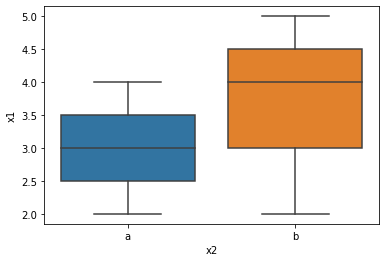

In [31]:
# boxplot (seaborn)
sns.boxplot(data=df, x='x2', y='x1')    # boxplot (seaborn)

{'whiskers': [<matplotlib.lines.Line2D at 0xa8c8160>,
 'caps': [<matplotlib.lines.Line2D at 0xa8c84c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xa8b8f70>,
 'medians': [<matplotlib.lines.Line2D at 0xa8c8820>,
 'fliers': [<matplotlib.lines.Line2D at 0xa8c89d0>,
 'means': []}

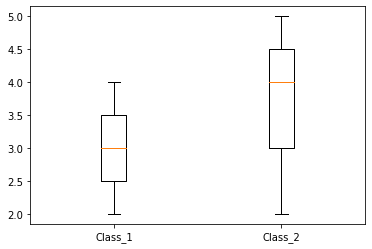

In [32]:
# boxplot (pyplot)
box1 = df[df['x2'] == 'a']['x1']
box2 = df[df['x2'] != 'a']['x1']
plt.boxplot([box1, box2], labels=['Class_1', 'Class_2'])        # boxplot (pyplot)

 ○ Draw Option 

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
        4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 30 artists>)

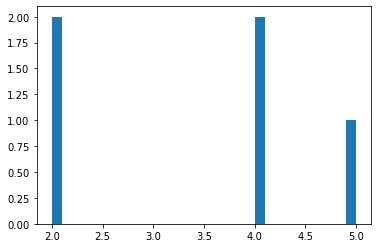

In [33]:
plt.hist(x=df['x1'], bins=30)      # 막대 갯수

(array([2., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

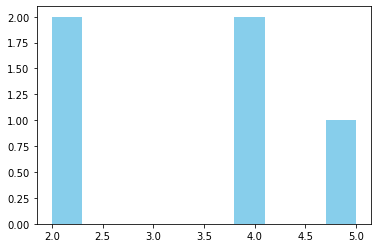

In [34]:
plt.hist(x=df['x1'], color='skyblue')      # 채우기색

(array([2., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

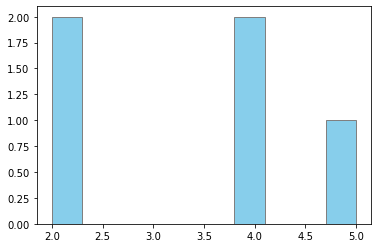

In [35]:
plt.hist(x=df['x1'], color='skyblue', edgecolor='grey')      # 외곽선

(array([2., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

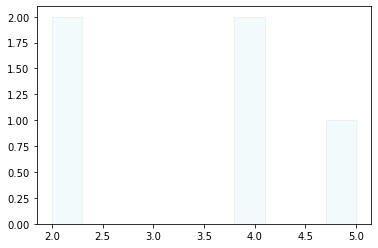

In [36]:
plt.hist(x=df['x1'], color='skyblue', edgecolor='grey', alpha=0.1)      # 투명도

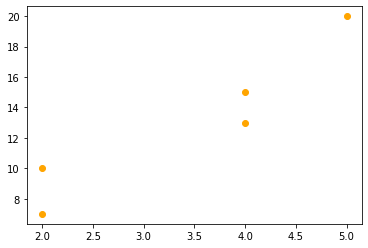

In [37]:
plt.scatter(x=df['x1'], y=df['y'], color='orange')      # 채우기색

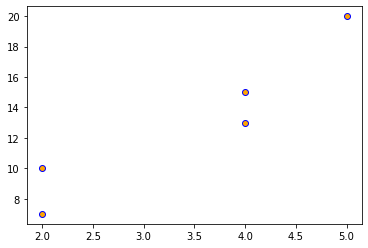

In [38]:
plt.scatter(x=df['x1'], y=df['y'], color='orange', edgecolor='blue')      # 외곽선

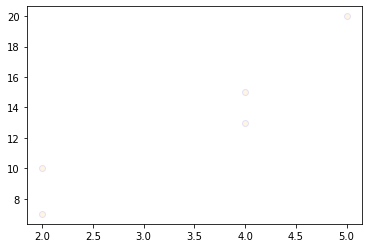

In [39]:
plt.scatter(x=df['x1'], y=df['y'], color='orange', edgecolor='blue', alpha=0.1)      # 투명도


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1'>

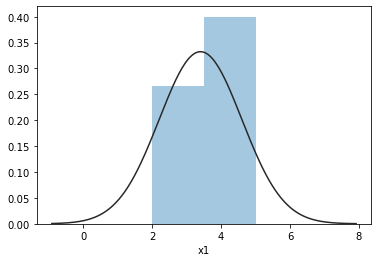

In [40]:
# Histogram with Normal Distribution Curve
from scipy import stats
sns.distplot(df['x1'], fit=stats.norm, kde=False)




 ○ Graph Draw Full Code

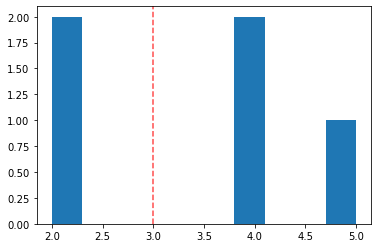

In [41]:
# 다중줄수행 및 기타 옵션 
plt.figure()                    # Canvas 그리기
plt.hist(x=df['x1'])            # Histogram
plt.axvline(3, color='red', ls='dashed', alpha=0.7)      # Vertical Line
plt.show()                      # plot 그리기의 종료(plt.show(), plot.close())

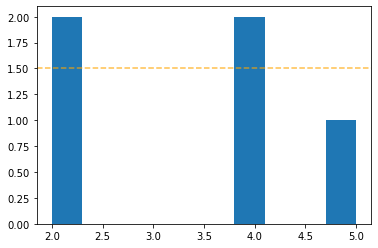

In [42]:
# Figure의 변수 저장 (plt.show)
f = plt.figure()
plt.hist(x=df['x1'])
plt.axhline(1.5, color='orange', ls='dashed', alpha=0.7)      # Horizontal Line
plt.show()

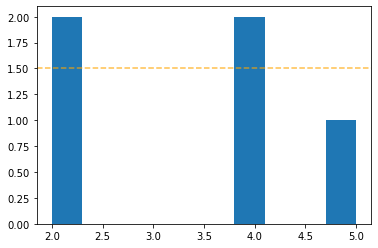

In [43]:
f

In [44]:
# Figure의 변수 저장 (plt.close)
f = plt.figure()
plt.hist(x=df['x1'])
plt.axhline(1.5, color='orange', ls='dashed', alpha=0.7)      # Horizontal Line
plt.close()

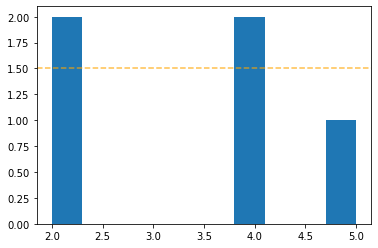

In [45]:
f

</br>
</br>
</br>
</br>
</br>

 ## Scipy (Statistics) 

 ○ Scipy Libarary 실행 """
from scipy import stats

In [46]:
df


,y,x1,x2,x3,x4
0,10,2,a,10,g1
1,13,4,a,8,g2
2,20,5,b,5,g1
3,7,2,b,12,g2
4,15,4,b,7,g3


 ○ t-test </br>
&nbsp;$nbsp; '두집단의 평균이 같은지?'를 비교하는 모수적 통계방법

In [47]:
df.agg(['mean', 'std'])

,y,x1,x3
mean,13.000000,3.400000,8.400000
std,4.949747,1.341641,2.701851


 ○ 1 Sample t 

In [48]:
# 1-sample t
stats.ttest_1samp(df['x1'], 4)   # x1 Column의 평균이 4와 같은가?


Ttest_1sampResult(statistic=-1.0, pvalue=0.373900966300059)

In [49]:
# 1-sample t
stats.ttest_1samp(df['x1'], 6)   # x1 Column의 평균이 6와 같은가?

Ttest_1sampResult(statistic=-4.333333333333333, pvalue=0.012317352470240385)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


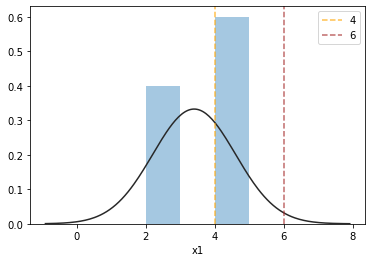

In [50]:
# # visualization (histogram)
plt.figure()
sns.distplot(df['x1'], bins=3, fit=stats.norm, kde=False, hist=True)
plt.axvline(4, alpha=0.7, ls='dashed', color='orange', label='4')
plt.axvline(6, alpha=0.7, ls='dashed', color='brown', label='6')
plt.legend()
plt.show()


 ○ 2 Sample t 

In [51]:
# gruop나누기
t1_data = df[df['x2']=='a']['x1']
t2_data = df[df['x2']=='b']['x1']

In [52]:
t1_data

0    2
1    4
Name: x1, dtype: int64

In [53]:
t2_data


2    5
3    2
4    4
Name: x1, dtype: int64

In [54]:
df.groupby('x2')['x1'].agg(['mean','std'])

,mean,std
x2,,
a,3.000000,1.414214
b,3.666667,1.527525


In [55]:
# 2-sample t
ttest_ind = stats.ttest_ind(t1_data, t2_data, equal_var=False)      # 두개 그룹의 평균이 같은가?
ttest_ind # 결과 : (t_value, p-value)

Ttest_indResult(statistic=-0.4999999999999999, pvalue=0.6588098059554004)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


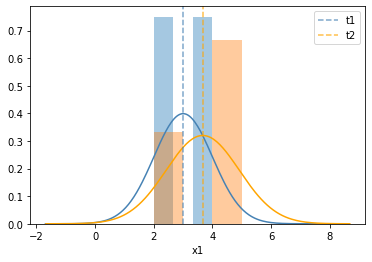

In [56]:
# visualization (Histogram)
plt.figure()
sns.distplot(t1_data, bins=3, fit=stats.norm, kde=False, hist=True, fit_kws={'color':'steelblue'})
sns.distplot(t2_data, bins=3, fit=stats.norm, kde=False, hist=True, fit_kws={'color':'orange'})
plt.axvline(t1_data.mean(), alpha=0.7, ls='dashed', color='steelblue', label='t1')
plt.axvline(t2_data.mean(), alpha=0.7, ls='dashed', color='orange', label='t2')
plt.legend()
plt.show()

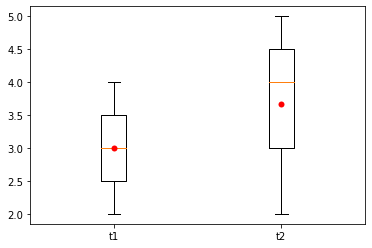

In [57]:
# visualization (boxplot)
plt.figure()
plt.boxplot([t1_data, t2_data], showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'none'})
plt.xticks([1,2], ['t1', 't2'])
plt.show()

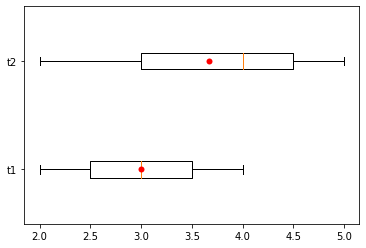

In [58]:
# visualization (vertical boxplot)
plt.figure()
plt.boxplot([t1_data, t2_data], vert=False, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'none'})
plt.yticks([1,2], ['t1', 't2'])
plt.show()




